In [57]:
#get the main dataset together
import pandas as pd

df = pd.read_excel('MyBookStats.xlsx', sheet_name='StatsMaster')

df.head()

,ALL_FirstName,ALL_LastName,Full Name,ALL_Position,ALL_Team,ALL_Week,ALL_Date,OFF_GEN_CompletionPercent,OFF_GEN_Drops,OFF_GEN_Pass2PTConv,...,ST_K_FGMadeYards20_29,ST_K_FGMadeYards40_49,ST_K_FGMadeYardsPast30,ST_K_FGMiss20_29,ST_K_FGMissed,ST_K_FGMissed30_39,ST_K_FGMissed40_49,ST_K_FGMissed50,ST_K_PointsScored,Column1
0,Patrick,Mahomes,Patrick Mahomes,QB,KC,1,2022-09-11,76.92,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Josh,Allen,Josh Allen,QB,BUF,1,2022-09-08,83.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Justin,Jefferson,Justin Jefferson,WR,MIN,1,2022-09-11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Carson,Wentz,Carson Wentz,QB,WAS,1,2022-09-11,65.85,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pittsburgh,Steelers,Pittsburgh Steelers,DEF,PIT,1,2022-09-11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#organize QBs in a list
QBCols = ['Full Name','ALL_Position','ALL_Team','ALL_Week','OFF_GEN_CompletionPercent', 'OFF_GEN_Pass2PTConv','OFF_GEN_PassYards','OFF_GEN_PassAtt','OFF_GEN_PassAttRZ','OFF_GEN_PassComp','OFF_GEN_PassFirstDowns','OFF_GEN_PassIncomp','OFF_GEN_PassINT','OFF_GEN_PassTD','OFF_GEN_RushYards','OFF_GEN_RushAtt','OFF_GEN_SackYardsLost','OFF_GEN_TimesSacked','OFF_QB_FirstDowns','OFF_GEN_RushTD','OFF_GEN_Snaps']
QBs = df[df['ALL_Position'] == 'QB'][QBCols]

QBs=QBs[QBs['OFF_GEN_Snaps'].notna()]
QBs = QBs.fillna(0)
QBs['fantasyScore'] = (QBs['OFF_GEN_PassYards']*.04)+(QBs['OFF_GEN_PassTD']*4)+(QBs['OFF_GEN_RushYards']*.1)-(QBs['OFF_GEN_PassINT']*2)+(QBs['OFF_GEN_RushTD']*6)+(QBs['OFF_GEN_Pass2PTConv']*2)

#Setup Excel output
output_path = 'Roster.xlsx'
excel_writer = pd.ExcelWriter(output_path, engine='xlsxwriter')

QBs.to_excel(excel_writer, sheet_name='QBs', index=False)

QBs.head()


,Full Name,ALL_Position,ALL_Team,ALL_Week,OFF_GEN_CompletionPercent,OFF_GEN_Pass2PTConv,OFF_GEN_PassYards,OFF_GEN_PassAtt,OFF_GEN_PassAttRZ,OFF_GEN_PassComp,...,OFF_GEN_PassINT,OFF_GEN_PassTD,OFF_GEN_RushYards,OFF_GEN_RushAtt,OFF_GEN_SackYardsLost,OFF_GEN_TimesSacked,OFF_QB_FirstDowns,OFF_GEN_RushTD,OFF_GEN_Snaps,fantasyScore
0,Patrick Mahomes,QB,KC,1,76.92,0.0,360.0,39.0,12.0,30.0,...,0.0,5.0,5.0,3.0,0.0,0.0,18.0,0.0,65.0,34.90
1,Josh Allen,QB,BUF,1,83.87,0.0,297.0,31.0,3.0,26.0,...,2.0,3.0,56.0,10.0,5.0,2.0,15.0,1.0,59.0,31.48
3,Carson Wentz,QB,WAS,1,65.85,1.0,313.0,41.0,3.0,27.0,...,2.0,4.0,12.0,6.0,8.0,1.0,12.0,0.0,77.0,27.72
6,Jalen Hurts,QB,PHI,1,56.25,0.0,243.0,32.0,4.0,18.0,...,0.0,0.0,90.0,17.0,4.0,1.0,17.0,1.0,77.0,24.72
9,Justin Herbert,QB,LAC,1,76.47,0.0,279.0,34.0,6.0,26.0,...,0.0,3.0,1.0,4.0,0.0,0.0,9.0,0.0,67.0,23.26


In [70]:
#Doing the same thing for RBs, TEs, and WRs
OFFCols = ['Full Name', 'ALL_Position','ALL_Team','ALL_Week','OFF_GEN_RecYards','OFF_GEN_RecTD','OFF_GEN_RushYards','Column1.stats.rec_2pt','OFF_GEN_RushTD','OFF_GEN_Snaps']
def sortPos(pos, df):
    #OffPos = ['WR','RB','TE']
    listItem = [pos]
    OFFdf = df[df['ALL_Position'].isin(listItem)][OFFCols]
    OFFdf=OFFdf[OFFdf['OFF_GEN_Snaps'].notna()]
    OFFdf = OFFdf.fillna(0)
    OFFdf['fantasyScore'] = (OFFdf['OFF_GEN_RushYards']*.1)+(OFFdf['OFF_GEN_RushTD']*6)+(OFFdf['OFF_GEN_RecTD']*6)+(OFFdf['OFF_GEN_RecYards']*.1)+(OFFdf['Column1.stats.rec_2pt']*2)
    OFFdf.to_excel(excel_writer, sheet_name=pos, index=False)
    return OFFdf

WR = sortPos('WR', df).reset_index()
RB = sortPos('RB', df).reset_index()
TE = sortPos('TE', df).reset_index()

WR.head()


,index,Full Name,ALL_Position,ALL_Team,ALL_Week,OFF_GEN_RecYards,OFF_GEN_RecTD,OFF_GEN_RushYards,Column1.stats.rec_2pt,OFF_GEN_RushTD,OFF_GEN_Snaps,fantasyScore
0,2,Justin Jefferson,WR,MIN,1,184.0,2.0,0.0,0.0,0.0,57.0,30.4
1,14,Davante Adams,WR,LV,1,141.0,1.0,0.0,0.0,0.0,55.0,20.1
2,21,Ja'Marr Chase,WR,CIN,1,129.0,1.0,0.0,0.0,0.0,100.0,18.9
3,24,Cooper Kupp,WR,LAR,1,128.0,1.0,0.0,0.0,0.0,67.0,18.8
4,25,Stefon Diggs,WR,BUF,1,122.0,1.0,0.0,0.0,0.0,38.0,18.2


In [67]:
#Grab player point averages
QBavgs = QBs.groupby("Full Name").agg({'ALL_Team':'first','OFF_GEN_CompletionPercent':'mean','OFF_GEN_Pass2PTConv':'mean','OFF_GEN_PassYards':'mean','OFF_GEN_PassINT':'mean','OFF_GEN_PassTD':'mean','OFF_GEN_RushYards':'mean','OFF_GEN_RushTD':'mean','fantasyScore': 'mean'}).reset_index()
QBavgs = QBavgs.round(2)
QBavgs = QBavgs.sort_values(by='fantasyScore', ascending=False)
QBavgs.to_excel(excel_writer, sheet_name='QBa', index=False)

#for normal offense
def grabAvgs(df, name):
    offavgs = df.groupby("Full Name").agg({'ALL_Team':'first', 'OFF_GEN_RecYards':'mean', 'OFF_GEN_RecTD':'mean','OFF_GEN_RushYards':'mean','Column1.stats.rec_2pt':'mean','OFF_GEN_RushTD':'mean','fantasyScore': 'mean'}).reset_index()
    offavgs = offavgs.round(2)
    offavgs = offavgs.sort_values(by='fantasyScore', ascending=False)
    offavgs.to_excel(excel_writer, sheet_name=name+'a', index=False)

grabAvgs(WR, 'WR')
grabAvgs(TE, 'TE')
grabAvgs(RB, 'RB')



In [68]:
#Same things for medians
QBmedian = QBs.groupby("Full Name").agg({'ALL_Team':'first','OFF_GEN_CompletionPercent':'median','OFF_GEN_Pass2PTConv':'median','OFF_GEN_PassYards':'median','OFF_GEN_PassINT':'median','OFF_GEN_PassTD':'median','OFF_GEN_RushYards':'median','OFF_GEN_RushTD':'median','fantasyScore': 'median'}).reset_index()
QBmedian = QBmedian.round(2)
QBmedian = QBmedian.sort_values(by='fantasyScore', ascending=False)
QBmedian.to_excel(excel_writer, sheet_name='QBm', index=False)

#for normal offense
def grabMedian(df, name):
    offavgs = df.groupby("Full Name").agg({'ALL_Team':'first', 'OFF_GEN_RecYards':'median', 'OFF_GEN_RecTD':'median','OFF_GEN_RushYards':'median','Column1.stats.rec_2pt':'median','OFF_GEN_RushTD':'median','fantasyScore': 'median'}).reset_index()
    offavgs = offavgs.round(2)
    offavgs = offavgs.sort_values(by='fantasyScore', ascending=False)
    offavgs.to_excel(excel_writer, sheet_name=name+'m', index=False)

grabMedian(WR, 'WR')
grabMedian(TE, 'TE')
grabMedian(RB, 'RB')

excel_writer.close()

/home/scott/Documents/Workspaces/personalPython/Fantasy/venv/lib/python3.10/site-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


## Small Visualization Stuff

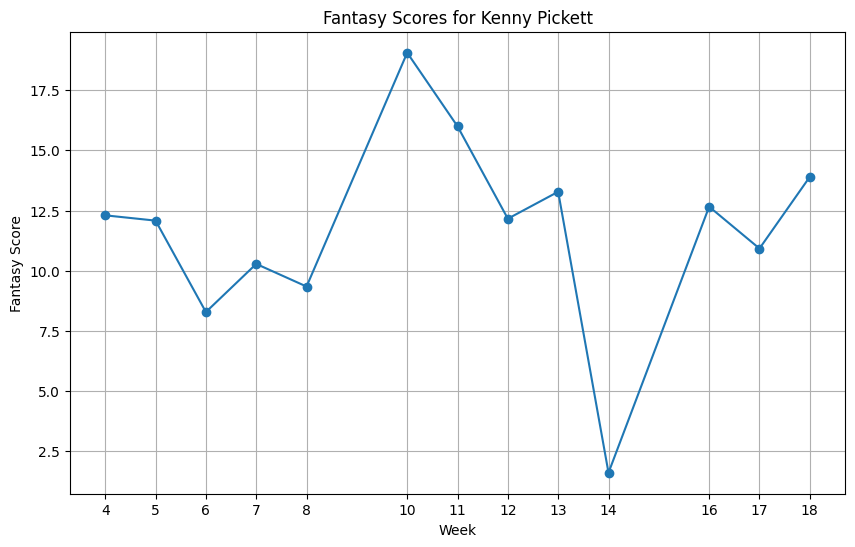

In [91]:
import matplotlib.pyplot as plt
#Note to self build this for webkit
player_name ="Kenny Pickett"
currDF = QBs

player_data = currDF[currDF['Full Name'] == player_name]
player_weekly_avg = player_data.groupby('ALL_Week')['fantasyScore'].mean()

plt.figure(figsize = (10,6))
plt.plot(player_weekly_avg.index,player_weekly_avg.values, marker='o')
plt.title(f'Fantasy Scores for {player_name}')
plt.xlabel('Week')
plt.ylabel('Fantasy Score')
plt.xticks(player_weekly_avg.index)
plt.grid(True)
plt.show()